CLIENTNUM

##### 타겟 데이터
    Attrition_Flag

#####  안성준
    Customer_Age
    Gender
    Dependent_count

#####  김용호
    Education_Level
    Marital_Status
    Income_Category

#####  문세웅
    Card_Category
    Months_on_book
    Total_Relationship_Count

#####  김희진
    Months_Inactive_12_mon
    Contacts_Count_12_mon
    Credit_Limit

#####  박민지
    Total_Revolving_Bal
    Avg_Open_To_Buy
    Total_Amt_Chng_Q4_Q1

#####  안영훈
    Total_Trans_Amt
    Total_Trans_Ct
    Total_Ct_Chng_Q4_Q1
    Avg_Utilization_Ratio

**필요한 모듈 임포트**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**데이터 불러오기**

In [12]:
df = pd.read_csv("./data/BankChurners.csv")

**데이터 정보 확인**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [15]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

**칼럼 확인**

df.keys()

**시각화**

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


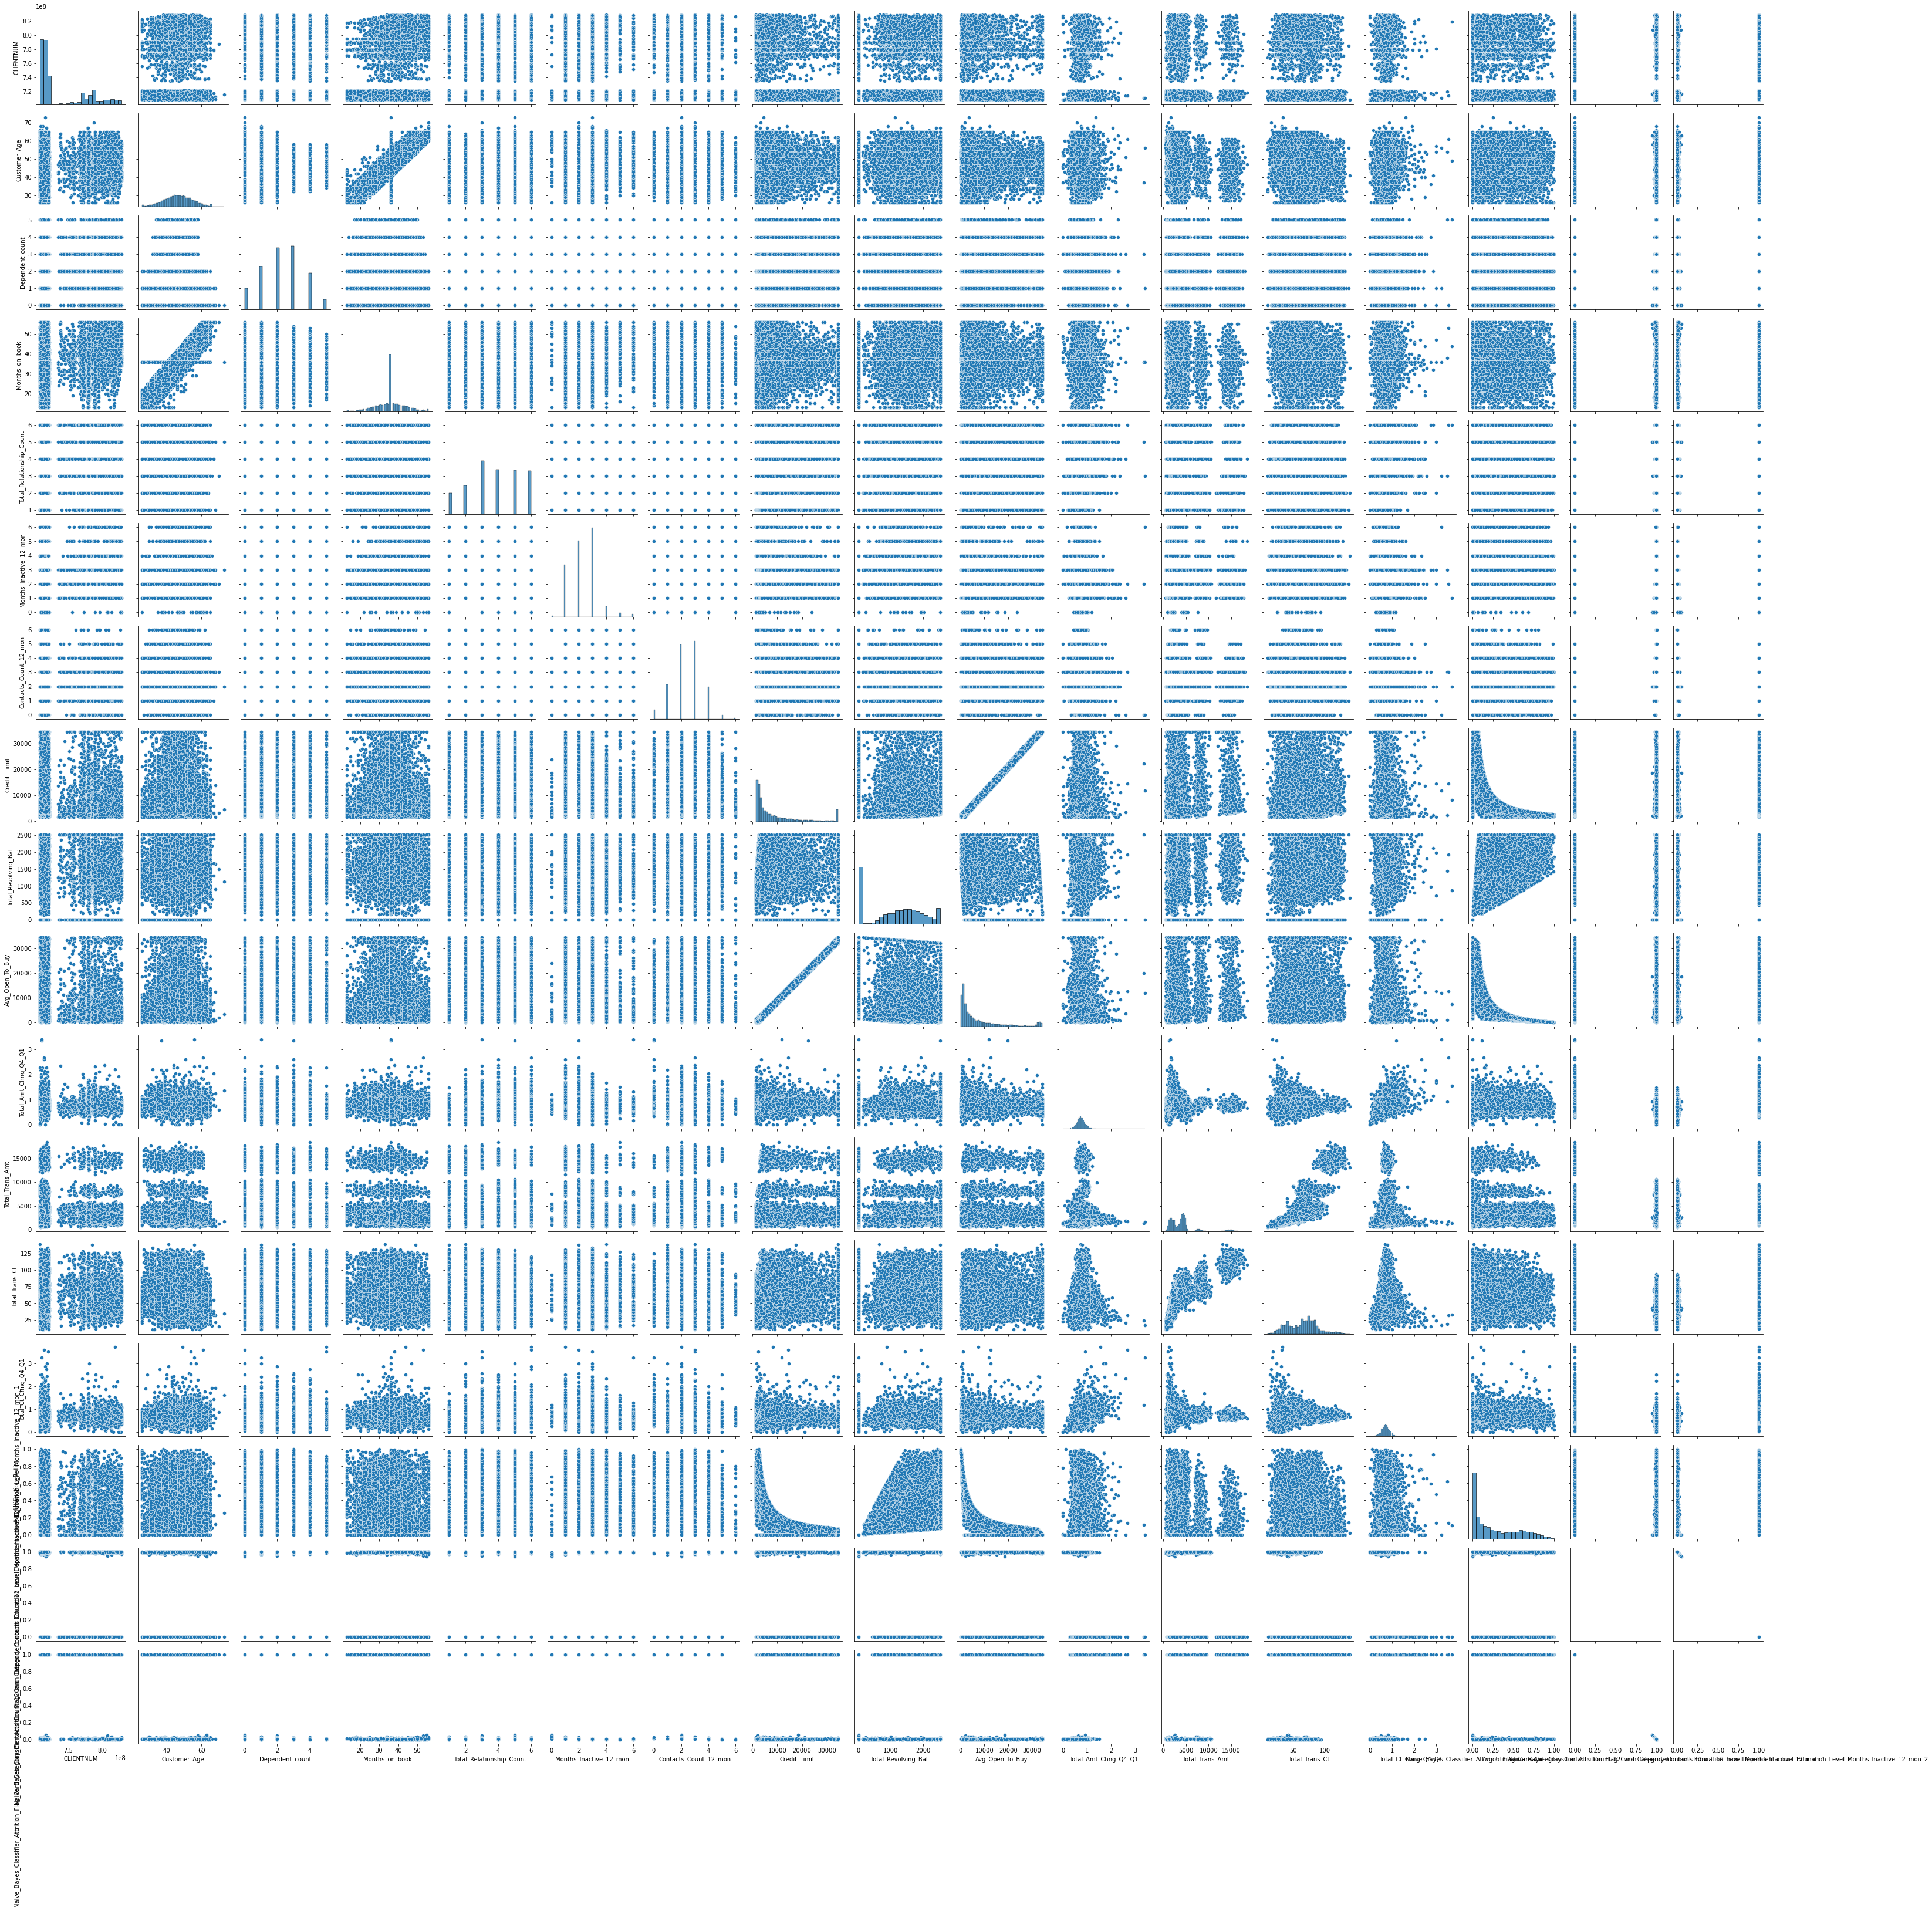

In [18]:
sns.pairplot(df)

**결측치 확인**

In [19]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

**결측치는 없다는 것을 확인할 수 있다.**

**첫번째 칼럼인 "CLIENTNUM"는 식별자로 사용됨으로 삭제해주도록 한다.**

In [32]:
df.iloc[:,0] 
df.drop("CLIENTNUM",axis=1,inplace=True)

**두번째 칼럼인 "Attriiton_Flag"는 타깃변수이고, "Existing Cumstomer"(카드 유지 고객)과 "Attrited Customer"(탈퇴고객)이 있다. 여기서 관찰대상은 탈퇴고객이므로 탈퇴고객을 1로하고 유지고객은 0으로 바꿔준다.** 

In [33]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [35]:
df["Attrition_Flag"].value_counts()
for i in range(10127):
    if df["Attrition_Flag"][i]=="Existing Customer":
        df["Attrition_Flag"][i]=0
    else:
        df["Attrition_Flag"][i]=1

/var/folders/zz/lwjzp_r130b4y7w9qcwwkfhr0000gn/T/ipykernel_4581/2783340963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Attrition_Flag"][i]=0
/var/folders/zz/lwjzp_r130b4y7w9qcwwkfhr0000gn/T/ipykernel_4581/2783340963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Attrition_Flag"][i]=1


In [10]:
df["Attrition_Flag"]

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: object

**"Existing Cumstomer"(카드 유지 고객)과 "Attrited Customer"(탈퇴고객)의 비율**

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Count'>

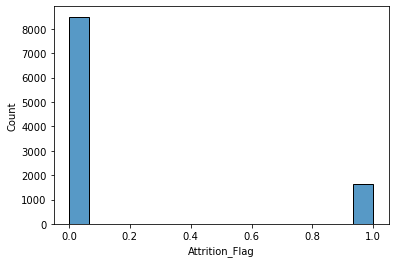

In [36]:
sns.histplot(df["Attrition_Flag"])

**"Existing Cumstomer(카드 유지 고객)"과 "Attrited Customer(탈퇴고객)"의 비율에 차이가 있는 것 같다. 수치를 비교해보도록 한다.**

In [49]:
Existing = df[df["Attrition_Flag"]==0]
Attrited = df[df["Attrition_Flag"]==1]

Existing_ratio = len(Existing)/len(Existing+Attrited)
Attrited_ratio = len(Attrited)/len(Existing+Attrited)

print("카드를 유지한 고객은 {:.2f} 이고, 탈퇴 고객은 {:.2f}이므로, 카드를 유지한 고객이 {:.0f}배 많다".format(Existing_ratio,Attrited_ratio,Existing_ratio/Attrited_ratio))

카드를 유지한 고객은 0.84 이고, 탈퇴 고객은 0.16이므로, 카드를 유지한 고객이 5배 많다


**업샘플링(오버샘플링)이나 다운샘플링(언더샘플링)이 필요한지 확인해 보아야한다.**

# 피처 데이터 확인 하기

**나이 칼럼 확인 하기**

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

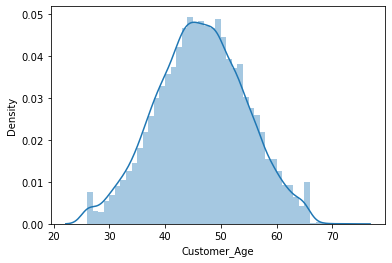

In [50]:
sns.distplot(df["Customer_Age"])

**Customer_Age (나이) 칼럼은 거의 완벽한 정규분포를 따른다는 것을 알 수 있다.**

**이상치 확인(시각화)**

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_Age'>

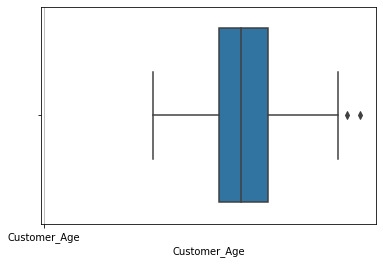

In [53]:
df[["Customer_Age"]].boxplot()
sns.boxplot(df["Customer_Age"])

**이상치 확인 (수치 확인)**

In [15]:
# 이상치 확인
q1 = np.quantile(df["Customer_Age"],0.25)
q3 = np.quantile(df["Customer_Age"],0.75)
iqr=q3-q1
q3+iqr*1.5
q1-iqr*1.5
cond1 = q3+iqr*1.5<df["Customer_Age"]
cond2 = df["Customer_Age"]<q1-iqr*1.5

In [16]:
outlier_index = df[cond1 | cond2].index

In [17]:
df.drop(outlier_index, axis=0, inplace=True)

In [18]:
df
# 이상치 2개가 삭제 된 것을 확인할 수 있다.

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0                  0            45      M                3     High School   
1                  0            49      F                5        Graduate   
2                  0            51      M                3        Graduate   
3                  0            40      F                4     High School   
4                  0            40      M                3      Uneducated   
...              ...           ...    ...              ...             ...   
10122              0            50      M                2        Graduate   
10123              1            41      M                2         Unknown   
10124              1            44      F                1     High School   
10125              1            30      M                2        Graduate   
10126              1            43      F                2        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
0            Married     $60K - $80K          Blue              39   
1             Single  Less than $40K          Blue              44   
2            Married    $80K - $120K          Blue              36   
3            Unknown  Less than $40K          Blue              34   
4            Married     $60K - $80K          Blue              21   
...              ...             ...           ...             ...   
10122         Single     $40K - $60K          Blue              40   
10123       Divorced     $40K - $60K          Blue              25   
10124        Married  Less than $40K          Blue              36   
10125        Unknown     $40K - $60K          Blue              36   
10126        Married  Less than $40K        Silver              25   

       Total_Relationship_Count  ...  Credit_Limit  Total_Revolving_Bal  \
0                             5  ...       12691.0                  777   
1                             6  ...        8256.0                  864   
2                             4  ...        3418.0                    0   
3                             3  ...        3313.0                 2517   
4                             5  ...        4716.0                    0   
...                         ...  ...           ...                  ...   
10122                         3  ...        4003.0                 1851   
10123                         4  ...        4277.0                 2186   
10124                         5  ...        5409.0                    0   
10125                         4  ...        5281.0                    0   
10126                         6  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...          

In [19]:
df["Gender"].value_counts()
# Female 아니면 Male로 이진분류가 잘 되어있다.
# Label Encoding을 해주면 되겠다.

F    5358
M    4767
Name: Gender, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["Gender"])
df["Gender"] = le.transform(df["Gender"])

In [21]:
df["Gender"] # 라벨인코딩 된 것을 확인 할 수 있다.

0        1
1        0
2        1
3        0
4        1
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: Gender, Length: 10125, dtype: int64

<AxesSubplot:title={'center':'Dependent_count'}, xlabel='Dependent_count', ylabel='Count'>

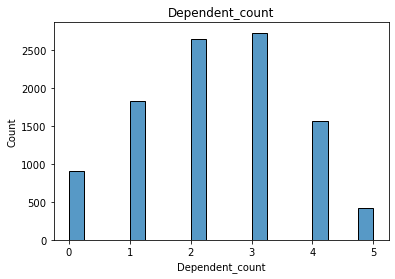

In [56]:
# 부양 가족 수 ( 특별한 전처리가 필요할 것 같진 않다.)
df["Dependent_count"].value_counts()
plt.title('Dependent_count')
sns.histplot(df['Dependent_count'],bins=20)

In [57]:
# 비활성 기간 ( 12개월 내 )
df["Months_Inactive_12_mon"].isnull().sum()

0

In [58]:
df["Months_Inactive_12_mon"].value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

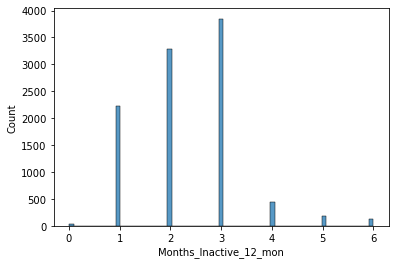

In [59]:
sns.histplot(df["Months_Inactive_12_mon"])

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Months_Inactive_12_mon'>

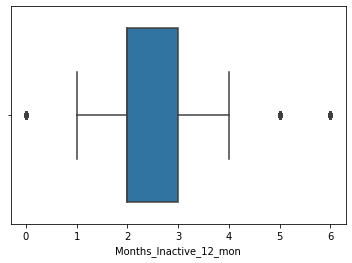

In [61]:
sns.boxplot(df["Months_Inactive_12_mon"])

In [40]:
df["Contacts_Count_12_mon"].isnull().sum()

0

In [41]:
df["Contacts_Count_12_mon"].value_counts()

3    3379
2    3226
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contacts_Count_12_mon'>

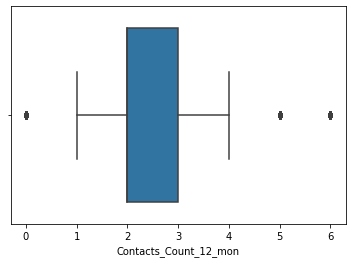

In [42]:
sns.boxplot(df["Contacts_Count_12_mon"])

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Count'>

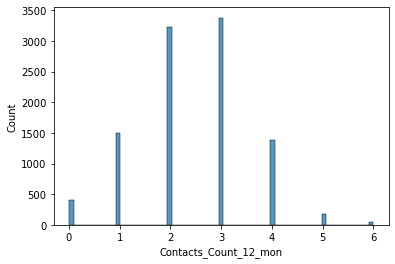

In [51]:
sns.histplot(df["Contacts_Count_12_mon"])

In [43]:
df["Credit_Limit"].isnull().sum()

0

In [44]:
df["Credit_Limit"].isnull().value_counts()

False    10125
Name: Credit_Limit, dtype: int64

/Users/heejinkim/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Limit'>

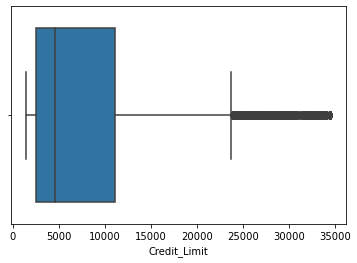

In [45]:
sns.boxplot(df["Credit_Limit"])

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

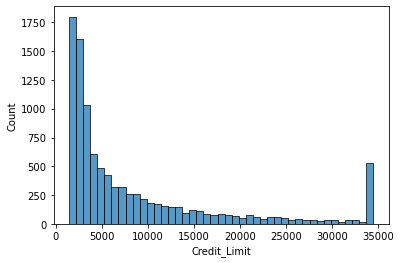

In [52]:
sns.histplot(df["Credit_Limit"])

In [54]:
df["Credit_Limit"].max()

34516.0

**신용한도가 일정 이상인 경우는 하나의 카테고리로 잡은 것 같다**